In [29]:
from matplotlib import pyplot as plt
import numpy as np

In [30]:
# 1st value: stem lenght, 2nd value: flower diameter, 3rd value: output(0 - green pea, 1 - yellow pea)

data = [
    [2,1,0],
    [6,1,1],
    [.5,2,0],
    [5,5,1],
    [2.5,4.5,0],
    [5,8,1],
    [5,.5,0],
    [7,8,1],
    [1,5,0],
    [8,3,1]
]

unknown_pea = [5.5,2.5]

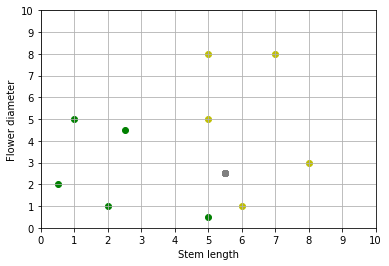

In [31]:
# Show data plot

def show_data():
    plt.grid()
    plt.axis([0, 10, 0, 10])
    plt.xticks(np.arange(0, 11, 1))
    plt.yticks(np.arange(0, 11, 1))
    plt.xlabel("Stem length")
    plt.ylabel("Flower diameter")

    for i in range(len(data)):
        c = "g"
        
        if data[i][2] == 1:
            c = "y"
        
        plt.scatter([data[i][0]], [data[i][1]], c=c)

        plt.scatter([unknown_pea[0]], [unknown_pea[1]], c='gray')

show_data()

In [32]:
# network
# 
#         o    pea color
#        / \   w1, w2, b
#       o   o  stem length, flower diameter

In [33]:
# activation function

def sigmoid(x):
    return 1/(1 + np.exp(-x))

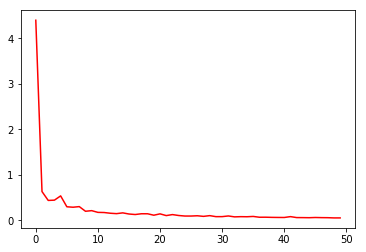

In [34]:
# train

def train(): 
    
    # Get the random values for weights and bias
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 50000
    step = 0.1
    costs = []
    
    for i in range(iterations):
        
        # Get the random pea from data array
        random_pea = data[np.random.randint(len(data))]
        
        # Calculate the prediction value that multiplies input data by weights and add bias
        prediction_value = w1 * random_pea[0] + w2 * random_pea[1] + b
        
        # Network output - result of Sigmoid function with prediction value
        prediction_output = sigmoid(prediction_value)
        true_output = random_pea[2] # Get the true result
        
        # Calculate squared error cost; smaller cost = smaller error in difference between prediction output and true output
        cost = np.square(prediction_output - true_output)
        
        # Add the sum of squared error costs for all training data to the array for displaying how error costs become smaller
        if i % 1000 == 0:
            c = 0
            for i in range(len(data)):
                some_pea = data[i]
                
                c += np.square(sigmoid(w1 * some_pea[0] + w2 * some_pea[1] + b) - some_pea[2])  
            costs.append(c)
        
        # Calculate the adjustment values that in practice are derivatives for each weight and bias
        w1_adjustment = 2 * (prediction_output - true_output) * sigmoid(prediction_value) * (1 - sigmoid(prediction_value)) * random_pea[0]
        w2_adjustment = 2 * (prediction_output - true_output) * sigmoid(prediction_value) * (1 - sigmoid(prediction_value)) * random_pea[1]
        bias_adjustment = 2 * (prediction_output - true_output) * sigmoid(prediction_value) * (1 - sigmoid(prediction_value)) * 1
        
        # Apply adjustments with a small coefficient
        w1 -= w1_adjustment * step
        w2 -= w2_adjustment * step
        b -= bias_adjustment * step
    
    return w1, w2, b, costs
    
w1, w2, b, costs = train()

# Shows how the error cost become samller
fig = plt.plot(costs, color="red")

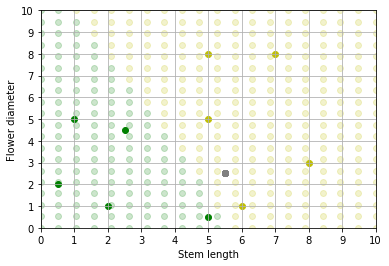

In [35]:
for x in np.linspace(0, 10, 20):
    for y in np.linspace(0, 10, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'g'
        if pred > .5:
            c = 'y'
        plt.scatter([x],[y],c=c, alpha=.2)
        
show_data()

# Shows graph with training data points.
# After training, color each point with green or yellow, 
# if the output is smaller than 0.5 then the point is green, otherwise, it is yellow.
# A graph is split and now we can predict the color only by knowing stem length and flower diameter
# A color for unknown pea can be identified and based on calculation the color is yellow.